In [10]:
import numpy as np
import pandas as pd

In [11]:
df = pd.read_csv("artifacts/preprocessed_data.csv")
df.head(3)

,Content,Label,num_words
0,notability magnus howie tag placed magnus howi...,0,237
1,big plan,0,2
2,najbolje je idea jean idea drug ako see bird m...,1,16


In [12]:
df.dropna(how='any', inplace=True)

In [13]:
import mlflow
import dagshub

from xgboost import XGBClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [5]:
import os
import warnings
warnings.filterwarnings("ignore")

from dotenv import load_dotenv
load_dotenv()

uri = os.getenv("MLFLOW_URI")
repo_owner = os.getenv("OWNER")
repo_name = os.getenv("REPO")

In [14]:
if uri is None:
	raise ValueError("MLFLOW_URI environment variable is not set.")
mlflow.set_tracking_uri(uri)

if repo_owner is None:
	raise ValueError("Missing dagshub logging environment credentials.")
dagshub.init(repo_owner=repo_owner, repo_name=repo_name, mlflow=True)

mlflow.set_experiment("Tuning XgBoost")

Initialized MLflow to track repo "SubinoyBera/Toxic-TweetTagger"

Repository SubinoyBera/Toxic-TweetTagger initialized!

<Experiment: artifact_location='mlflow-artifacts:/0cce527ae5ba440aa1fd240c0c5612e3', creation_time=1752481316142, experiment_id='5', last_update_time=1752481316142, lifecycle_stage='active', name='Tuning XgBoost', tags={}>

In [9]:
def log_model_params(model):
    params_to_log = {}
    params_to_log["n_estimators"] = model.n_estimators
    params_to_log["learning_rate"] = model.learning_rate
    params_to_log["max_depth"] = model.max_depth
    params_to_log["reg_lambda"] = model.reg_lambda
    params_to_log["gamma"] = model.gamma

    mlflow.log_params(params_to_log)

In [16]:
from mlflow.xgboost import log_model

In [ ]:
def run_experiment(X_train, X_test, y_train, y_test):
    try:
        with mlflow.start_run(run_name='XGB-1'):

            mlflow.log_param("vectorizer", "TF-IDF")
            mlflow.log_param("num_features", 3000)

            model = XGBClassifier(n_estimators=1000, learning_rate=0.1, max_depth=12, gamma=0.1, reg_lambda=1, 
                                 subsample=0.8, n_jobs=-1, random_state=42, use_label_encoder=False)

            model.fit(X_train, y_train)

            y_pred = model.predict(X_test)

            log_model_params(model)

            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)
            roc_auc = roc_auc_score(y_test, y_pred)

            mlflow.log_metric("accuracy", float(accuracy))
            mlflow.log_metric("precision", float(precision))
            mlflow.log_metric("recall", float(recall))
            mlflow.log_metric("f1", float(f1))
            mlflow.log_metric("roc_auc", float(roc_auc))

            log_model(model, "XGB-v1")
            print("Done!")

            print(f"\n\n Accuary: {accuracy}\n Precision: {precision}\n Recall: {recall}\n f1 score: {f1}\n roc-auc: {roc_auc}")

    except Exception as e:
        print(f"Error in model training and or tracking: {e}")
        raise e

In [10]:
vec1 = TfidfVectorizer(max_features=3000, min_df=3)

X = vec1.fit_transform(df['Content'])
y = df['Label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
run_experiment(X_train, X_test, y_train, y_test)

2025/07/23 15:55:03 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Done!


 Accuary: 0.8129742349703994
 Precision: 0.8161533893272249
 Recall: 0.805762626685652
 f1 score: 0.8109247239315519
 roc-auc: 0.8129419093418299
🏃 View run XGB-1 at: https://dagshub.com/SubinoyBera/Toxic-TweetTagger.mlflow/#/experiments/5/runs/f6ff81c7356644e79298823c0fafb4ca
🧪 View experiment at: https://dagshub.com/SubinoyBera/Toxic-TweetTagger.mlflow/#/experiments/5


In [10]:
# Register model
model_name = "Production Model"
run_id = input("Enter the run ID to register the model: ")

model_uri = f"runs:/{run_id}/{model_name}"
mlflow.register_model(model_uri=model_uri, name=model_name)

Registered model 'Production Model' already exists. Creating a new version of this model...
2025/07/23 19:32:18 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Production Model, version 2
Created version '2' of model 'Production Model'.


<ModelVersion: aliases=[], creation_timestamp=1753279340053, current_stage='None', description='', last_updated_timestamp=1753279340053, name='Production Model', run_id='f6ff81c7356644e79298823c0fafb4ca', run_link='', source=('mlflow-artifacts:/0cce527ae5ba440aa1fd240c0c5612e3/f6ff81c7356644e79298823c0fafb4ca/artifacts/Production '
 'Model'), status='READY', status_message=None, tags={}, user_id='', version='2'>

In [17]:
def run_experiment(X_train, X_test, y_train, y_test):
    try:
        with mlflow.start_run(run_name='XGB-ultra'):

            mlflow.log_param("vectorizer", "TF-IDF")
            mlflow.log_param("num_features", 3200)

            model = XGBClassifier(n_estimators=1100, learning_rate=0.1, max_depth=17, gamma=0.15, reg_lambda=0.5, 
                                 subsample=0.8, n_jobs=-1, random_state=42, use_label_encoder=False)

            model.fit(X_train, y_train)

            y_pred = model.predict(X_test)

            log_model_params(model)

            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)
            roc_auc = roc_auc_score(y_test, y_pred)

            mlflow.log_metric("accuracy", float(accuracy))
            mlflow.log_metric("precision", float(precision))
            mlflow.log_metric("recall", float(recall))
            mlflow.log_metric("f1", float(f1))

            log_model(model, "XGB-ultra")
            print("Done!")

            print(f"\n\n Accuary: {accuracy}\n Precision: {precision}\n Recall: {recall}\n f1 score: {f1}\n roc-auc: {roc_auc}")

    except Exception as e:
        print(f"Error in model training and or tracking: {e}")
        raise e

In [ ]:
vec2 = TfidfVectorizer(max_features=3200, min_df=3)

X = vec2.fit_transform(df['Content'])
y = df['Label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

run_experiment(X_train, X_test, y_train, y_test)

2025/07/24 13:31:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Done!


 Accuary: 0.8156841490869674
 Precision: 0.8142451095134593
 Recall: 0.815813719742022
 f1 score: 0.8150286598887075
 roc-auc: 0.8156847298801418
🏃 View run XGB-ultra at: https://dagshub.com/SubinoyBera/Toxic-TweetTagger.mlflow/#/experiments/5/runs/5e6789f8474b4153b0bdfce09c0505b6
🧪 View experiment at: https://dagshub.com/SubinoyBera/Toxic-TweetTagger.mlflow/#/experiments/5


In [14]:
# Register model
model_name = "Production Model"
run_id = input("Enter the run ID to register the model: ")

model_uri = f"runs:/{run_id}/{model_name}"
mlflow.register_model(model_uri=model_uri, name=model_name)

Registered model 'Production Model' already exists. Creating a new version of this model...
2025/07/23 20:03:16 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Production Model, version 3
Created version '3' of model 'Production Model'.


<ModelVersion: aliases=[], creation_timestamp=1753281198554, current_stage='None', description='', last_updated_timestamp=1753281198554, name='Production Model', run_id='4d117e145e6a4baaa449cbdf75ba8282', run_link='', source=('mlflow-artifacts:/0cce527ae5ba440aa1fd240c0c5612e3/4d117e145e6a4baaa449cbdf75ba8282/artifacts/Production '
 'Model'), status='READY', status_message=None, tags={}, user_id='', version='3'>

In [15]:
def run_experiment(X_train, X_test, y_train, y_test):
    try:
        with mlflow.start_run(run_name='XGB-3'):

            mlflow.log_param("vectorizer", "TF-IDF")
            mlflow.log_param("num_features", 3000)

            model = XGBClassifier(n_estimators=700, learning_rate=0.07, max_depth=10, gamma=0.1, reg_lambda=1, 
                                 subsample=0.8, n_jobs=-1, random_state=42, use_label_encoder=False)

            model.fit(X_train, y_train)

            y_pred = model.predict(X_test)

            log_model_params(model)

            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)
            roc_auc = roc_auc_score(y_test, y_pred)

            mlflow.log_metric("accuracy", float(accuracy))
            mlflow.log_metric("precision", float(precision))
            mlflow.log_metric("recall", float(recall))
            mlflow.log_metric("f1", float(f1))
            mlflow.log_metric("roc_auc", float(roc_auc))

            log_model(model, "XGB-v3")
            print("Done!")

            print(f"\n\n Accuary: {accuracy}\n Precision: {precision}\n Recall: {recall}\n f1 score: {f1}\n roc-auc: {roc_auc}")

    except Exception as e:
        print(f"Error in model training and or tracking: {e}")
        raise e

In [ ]:
vec3 = TfidfVectorizer(max_features=3500, min_df=3)

X = vec3.fit_transform(df['Content'])
y = df['Label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

run_experiment(X_train, X_test, y_train, y_test)

2025/07/23 20:26:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Done!


 Accuary: 0.8082214625198032
 Precision: 0.8188374315752889
 Recall: 0.7893458413602479
 f1 score: 0.8038212214261344
 roc-auc: 0.808136853609484
🏃 View run XGB-3 at: https://dagshub.com/SubinoyBera/Toxic-TweetTagger.mlflow/#/experiments/5/runs/d9cc594635d9456ca0fb2aecc927afdc
🧪 View experiment at: https://dagshub.com/SubinoyBera/Toxic-TweetTagger.mlflow/#/experiments/5


In [ ]:
def run_experiments(X_train, X_test, y_train, y_test):
    try:
        with mlflow.start_run(run_name='XGB-4'):

            mlflow.log_param("vectorizer", "TF-IDF")
            mlflow.log_param("num_features", 3000)

            model= XGBClassifier(n_estimators=800, learning_rate=0.1, max_depth=13, gamma=0.5, reg_lambda=1, 
                                 subsample=0.8, n_jobs=-1, random_state=42, use_label_encoder=False)

            model.fit(X_train, y_train)
            
            log_model_params(model)

            y_pred = model.predict(X_test)

            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)
            roc_auc = roc_auc_score(y_test, y_pred)

            mlflow.log_metric("accuracy", float(accuracy))
            mlflow.log_metric("precision", float(precision))
            mlflow.log_metric("recall", float(recall))
            mlflow.log_metric("f1", float(f1))
            mlflow.log_metric("roc_auc", float(roc_auc))

            log_model(model, "XGB-v4")
            print("Done!")

            print(f"\n\n Accuary: {accuracy}\n Precision: {precision}\n Recall: {recall}\n f1 score: {f1}\n roc-auc: {roc_auc}")

    except Exception as e:
        print(f"Error in model training and or tracking: {e}")
        raise e
    

vec4 = TfidfVectorizer(max_features=3000, min_df=3)

X = vec4.fit_transform(df['Content'])
y = df['Label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

run_experiments(X_train, X_test, y_train, y_test)

In [ ]:
def run_experiments(X_train, X_test, y_train, y_test):
    try:
        with mlflow.start_run(run_name='XGB-5'):

            mlflow.log_param("vectorizer", "TF-IDF")
            mlflow.log_param("num_features", 3000)

            model = XGBClassifier(n_estimators=1000, max_depth=8, learning_rate=0.1, subsample=0.8, n_jobs=-1,
                                gamma=0.2, reg_lambda=1.2,  random_state=100, eval_metric='logloss',early_stopping_rounds=35, use_label_encoder=False)

            model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=True)

            print("Best iteration:", model.best_iteration)
            print("Best score:", model.best_score)

            log_model_params(model)

            y_pred = model.predict(X_test)

            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)
            roc_auc = roc_auc_score(y_test, y_pred)

            mlflow.log_metric("accuracy", float(accuracy))
            mlflow.log_metric("precision", float(precision))
            mlflow.log_metric("recall", float(recall))
            mlflow.log_metric("f1", float(f1))
            mlflow.log_metric("roc_auc", float(roc_auc))

            log_model(model, "XGB-v5")

            print("Done!")
            print(f"\n\n Accuary: {accuracy}\n Precision: {precision}\n Recall: {recall}\n f1 score: {f1}\n roc-auc: {roc_auc}")

    except Exception as e:
        print(f"Error in model training and or tracking: {e}")
        raise e
    

vec5 = TfidfVectorizer(max_features=3000, min_df=3)

X = vec5.fit_transform(df['Content'])
y = df['Label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

run_experiments(X_train, X_test, y_train, y_test)

In [18]:
# Register model
model_name = "Production Model"
run_id = input("Enter the run ID to register the model: ")

model_uri = f"runs:/{run_id}/{model_name}"
mlflow.register_model(model_uri=model_uri, name=model_name)

Registered model 'Production Model' already exists. Creating a new version of this model...
2025/07/24 00:21:58 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Production Model, version 4
Created version '4' of model 'Production Model'.


<ModelVersion: aliases=[], creation_timestamp=1753296720911, current_stage='None', description='', last_updated_timestamp=1753296720911, name='Production Model', run_id='b8b8b550f7f44093b1abec24762883e9', run_link='', source=('mlflow-artifacts:/0cce527ae5ba440aa1fd240c0c5612e3/b8b8b550f7f44093b1abec24762883e9/artifacts/Production '
 'Model'), status='READY', status_message=None, tags={}, user_id='', version='4'>

In [1]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
import mlflow
from mlflow.xgboost import log_model
import dagshub

uri = "https://dagshub.com/SubinoyBera/Toxic-TweetTagger.mlflow"
repo_owner = "SubinoyBera"
repo_name = 'Toxic-TweetTagger'

In [2]:
df = pd.read_csv(r"D:\My Projects\Toxic Tweet-Tagger\notebooks\artifacts\preprocessed_data.csv")
df.head()

,Content,Label,num_words
0,notability magnus howie tag placed magnus howi...,0,237
1,big plan,0,2
2,najbolje je idea jean idea drug ako see bird m...,1,16
3,disruptive appear attention seeking remark arg...,1,200
4,reign man really ignorant person perfect examp...,1,19


In [3]:
df.dropna(how='any', inplace=True)

In [4]:
mlflow.set_tracking_uri(uri)

dagshub.init(repo_owner=repo_owner, repo_name=repo_name, mlflow=True)

mlflow.set_experiment("DVC Pipeline Model Experiments")

Accessing as SubinoyBera

Initialized MLflow to track repo "SubinoyBera/Toxic-TweetTagger"

Repository SubinoyBera/Toxic-TweetTagger initialized!

<Experiment: artifact_location='mlflow-artifacts:/51c598c3d6174cb485d9559e220cd550', creation_time=1753365171647, experiment_id='7', last_update_time=1753365171647, lifecycle_stage='active', name='DVC Pipeline Model Experiments', tags={'mlflow.experimentKind': 'custom_model_development'}>

In [5]:
%cd ..

d:\My Projects\Toxic Tweet-Tagger


In [6]:
X = df['Content']
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
import json
import os
import joblib
from pathlib import Path

model_name = "XGB-v4"
model_path = Path("D:\\My Projects\\Toxic Tweet-Tagger\\test_models")

In [11]:
import pandas as pd
import mlflow.pyfunc
from mlflow.pyfunc.model import PythonModel

# Custom model class to wrap the ML model and vectorizer
class CustomModel(PythonModel):
    def __init__(self, model, vectorizer):
        """
        Initializes the CustomModel instance with a machine learning model and a vectorizer.

        Args:
            model: The machine learning model to be used for prediction.
            vectorizer: The vectorizer to transform input data for the model.
        """
        self.model = model
        self.vectorizer = vectorizer

    def predict(self, context, model_input: pd.DataFrame):
        text = model_input["text"]
        if self.vectorizer is not None and self.model is not None:
            X = self.vectorizer.transform(text)
            class_label = self.model.predict(X)
        
        return class_label

    def predict_proba(self, context, model_input: pd.DataFrame):
        text = model_input["text"]
        if self.vectorizer is not None and self.model is not None:
            X = self.vectorizer.transform(text)
            class_proba = self.model.predict_proba(X)
        
        return class_proba

In [12]:
def run_experiment(X_train, X_test, y_train, y_test):
    try:
        with mlflow.start_run(run_name=model_name) as run:

            vec = TfidfVectorizer(max_features=3200, min_df=3)
            X_features = vec.fit_transform(X_train).astype("float32")
            y_train = y_train.values

            mlflow.log_param("vectorizer", "TF-IDF")
            mlflow.log_param("num_features", 3200)

            #save vectorizer
            joblib.dump(vec, Path(model_path, "vectorizer.joblib"))

            model = XGBClassifier(n_estimators=550, learning_rate=0.1, max_depth=6, tree_method="hist",
                                  max_bin=128, scale_pos_weight = 1.15, reg_lambda=1, subsample=0.8,
                                  colsample_bytree=0.7, n_jobs=-1, predictor="cpu_predictor", random_state=42,
                                  use_label_encoder=False)
            # train model
            model.fit(X_features, y_train)
            joblib.dump(model, Path(model_path, "model.joblib"))

            # get xgb booster
            booster = model.get_booster()
            booster.save_model(Path(model_path, "booster.json"))

            #prediction
            X_test_features = vec.transform(X_test)
            y_probs = model.predict_proba(X_test_features)[:,1]

            threshold = 0.48
            y_pred = (y_probs >= threshold).astype(int)

            #metrics
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)
            roc_auc = roc_auc_score(y_test, y_probs)

            log_model_params(model)

            mlflow.log_metric("accuracy", float(accuracy))
            mlflow.log_metric("precision", float(precision))
            mlflow.log_metric("recall", float(recall))
            mlflow.log_metric("f1", float(f1))
            mlflow.log_metric("roc_auc", float(roc_auc))

            final_model = CustomModel(model=model, vectorizer=vec)

            evaluation_report = {
                "threshold": threshold,
                "accuracy": accuracy_score(y_test, y_pred),                 # type: ignore
                "precision": precision_score(y_test, y_pred),               # type: ignore
                "recall": recall_score(y_test, y_pred),                     # type: ignore
                "f1 score": f1_score(y_test, y_pred),                       # type: ignore
                "roc_auc": roc_auc_score(y_test, y_probs)                   # type: ignore
            }

            with open(Path(model_path, "metrics.json"), "w") as f:
                json.dump(evaluation_report, f)
            
            mlflow.pyfunc.log_model(
                artifact_path = model_name,
                python_model = final_model,
                artifacts={"vectorizer": os.path.join(model_path, "vectorizer.joblib"),
                           "model": os.path.join(model_path, "model.joblib"),
                           "booster": os.path.join(model_path, "booster.json"),
                           "metrics": os.path.join(model_path, "metrics.json")}
            )
            
            print("Done!")

            print(f"\n\n Accuary: {accuracy}\n Precision: {precision}\n Recall: {recall}\n f1 score: {f1}\n roc-auc: {roc_auc}")

    except Exception as e:
        print(f"Error in model training and or tracking: {e}")
        raise e

In [13]:
import warnings
warnings.filterwarnings("ignore")
run_experiment(X_train, X_test, y_train, y_test)

2026/02/17 09:06:56 WARNING mlflow.pyfunc: Failed to infer model signature: Type hint <input: <class 'pandas.core.frame.DataFrame'>, output: None> cannot be used to infer model signature and input example is not provided, model signature cannot be inferred.
2026/02/17 09:07:23 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Done!


 Accuary: 0.80601184024014
 Precision: 0.7922348788705278
 Recall: 0.8272049585392411
 f1 score: 0.8093423478795329
 roc-auc: 0.8852078424195188
🏃 View run XGB-v4 at: https://dagshub.com/SubinoyBera/Toxic-TweetTagger.mlflow/#/experiments/7/runs/9b6349ac22e04cf0a22257952299e056
🧪 View experiment at: https://dagshub.com/SubinoyBera/Toxic-TweetTagger.mlflow/#/experiments/7


### Using Glove Embeddings

In [ ]:
from pathlib import Path
import numpy as np
import pandas as pd
import string
from nltk.stem import WordNetLemmatizer
import kagglehub

# Download glove latest version
path = kagglehub.dataset_download("adityajn105/glove6b50d")

print("Path to dataset files:", path)

In [7]:

def load_glove_embeddings(glove_path):
    embedding_index = {}
    with open(glove_path, 'r', encoding='utf8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embedding_index[word] = coefs
    print(f"Loaded {len(embedding_index)} word vectors from GloVe")
    return embedding_index

glove_path = path 
glove_embeddings = load_glove_embeddings(Path(path, "glove.6B.50d.txt"))


Loaded 400000 word vectors from GloVe


In [10]:
df = pd.read_csv("artifacts/final_data.csv")

In [12]:
# Lower casing
def lower_case(text):
    return text.lower()

# Removing punctuations 
def remove_punctuations(text):
    """Removes all punctuation marks from the given text."""
    exclude = string.punctuation
    return text.translate(str.maketrans("", "", exclude))

# Lemmatizing words
def lemmatization(text):
    lemmtizer = WordNetLemmatizer()
    text_words = text.split()
    text = [lemmtizer.lemmatize(word) for word in text_words]

    return " ".join(text)

In [ ]:
# Preprocessing function
from tqdm import tqdm
def preprocess(df):
    try:
        tqdm.pandas()
        print("Performing lowercasing...")
        df['Content'] = df['Content'].progress_apply(lower_case)

        print("Removing punctuations...")
        df['Content'] = df['Content'].progress_apply(remove_punctuations)
        
        print("\n Performing lemmatization")
        df['Content'] = df['Content'].progress_apply(lemmatization)

        print("\n Finished preprocessing successfully")
        return df
    
    except Exception as e:
        print(f"Error during preprocessing: {e}")
        raise

norm_df = preprocess(df)

In [ ]:
# Shuffle the rows
norm_df = norm_df.sample(frac=1, random_state=42).reset_index(drop=True)
norm_df.dropna(inplace=True)

In [19]:
X = norm_df['Content'].astype(str)
y = norm_df['Label']

In [21]:
import re
def text_to_glove_vector(text, embeddings, dim=100):
    words = re.findall(r'\b\w+\b', text.lower())
    vectors = [embeddings[word] for word in words if word in embeddings]
    if len(vectors) == 0:
        return np.zeros(dim)  
    return np.mean(vectors, axis=0)

In [23]:
X_glove = np.vstack([text_to_glove_vector(text, glove_embeddings, dim=50) for text in tqdm(X)])

  0%|          | 0/120000 [00:00<?, ?it/s]

100%|██████████| 120000/120000 [00:10<00:00, 11640.51it/s]


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_glove, y, test_size=0.2, random_state=42, stratify=y )

In [ ]:
def run_experiment(X_train, X_test, y_train, y_test):
    try:
        with mlflow.start_run(run_name='XGB-10'):

            mlflow.log_param("vectorizer", "Glove")

            model = XGBClassifier(n_estimators=2000, max_depth=20, learning_rate=0.05, subsample=0.8, n_jobs=-1,
                                  objective='binary:logistic', gamma=0.1, reg_lambda=1,  random_state=42,
                                  use_label_encoder=False, eval_metric=['logloss', 'error'], early_stopping_rounds=50)

            model.fit(X_train, y_train, eval_set=[(X_train, y_train),(X_test, y_test)], verbose=True)

            print("Best iteration:", model.best_iteration)
            print("Best score:", model.best_score)

            log_model_params(model)

            y_pred = model.predict(X_test)

            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)
            roc_auc = roc_auc_score(y_test, y_pred)

            mlflow.log_metric("accuracy", float(accuracy))
            mlflow.log_metric("precision", float(precision))
            mlflow.log_metric("recall", float(recall))
            mlflow.log_metric("f1", float(f1))
            mlflow.log_metric("roc_auc", float(roc_auc))

            log_model(model, "XGB-v10")
            print("Done!")

            print(f"\n\n Accuary: {accuracy}\n Precision: {precision}\n Recall: {recall}\n f1 score: {f1}\n roc-auc: {roc_auc}")

    except Exception as e:
        print(f"Error in model training and or tracking: {e}")
        raise e
    
run_experiment(X_train, X_test, y_train, y_test)

In [1]:
%cd ..

d:\My Projects\Toxic Tagger


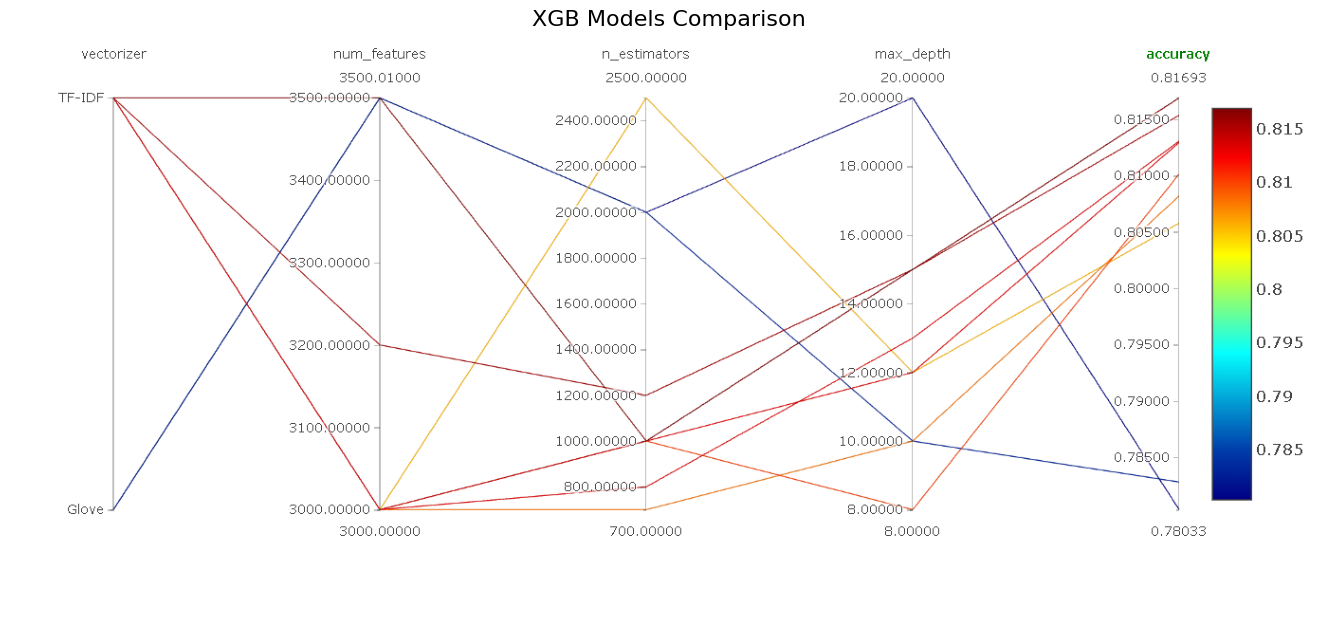

In [2]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("images/tuning_xgb.png")
plt.figure(figsize=(17, 13))
plt.imshow(img)
plt.title("XGB Models Comparison", fontsize=16, color='black')
plt.axis('off')
plt.show()

From the experiments we pick the XgBoost Model with Tfidf-Vectorizer having num_feature=3500 and n_estimators=1200 with max_depth=15 as our best model since we are focusing on accuracy score.